<a href="https://colab.research.google.com/github/Maria-Ul/Advanced-ML/blob/main/Individual_task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import imutils.paths as paths
from google.colab.patches import cv2_imshow

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
def extract_histogram(image, bins=(8, 8, 8)):
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

In [ ]:
def loadTrainingImages1(PATH):
    images = []
    hist =[]
    imagePaths = sorted(list(paths.list_images(PATH)))
    for i in range(len(imagePaths)):
        img = cv2.imread(imagePaths[i])
        #img = img_to_array(img)
        hist.append(extract_histogram(img))
        images.append(img)

    y = np.zeros(len(imagePaths))

    for i in range(len(y)):
      if 'cat' in imagePaths[i].lower():
        y[i] = int(0)
      if 'dog' in imagePaths[i].lower():
        y[i] = int(1)


    return images, y, hist, imagePaths

Обучите классификатор LinearSVC() при C = 0.51 и random_state = 9 на предложенной выборке. Используйте параметр random_state = 9 для разделения выборки на тренировочную и тестовую части, в отношении 75/25 функции train_test_split().



In [ ]:
images , y, X, imagePaths = loadTrainingImages1(PATH = "/content/drive/MyDrive/train")


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=9)

In [ ]:
clf= LinearSVC(C = 0.51, random_state = 9 )

In [ ]:
clf.fit(X_train, y_train)

LinearSVC(C=0.51, random_state=9)

In [ ]:
clf.classes_

array([0., 1.])

In [ ]:
clf.intercept_

array([-0.07934079])

In [ ]:
np.array(clf.coef_).shape

(1, 512)

In [ ]:
round(clf.coef_[0,256],2)

0.01

In [ ]:
round(clf.coef_[0,370],2)

-0.04

In [ ]:
round(clf.coef_[0,124],2)

0.0

Составьте матрицу ошибок для каждого класса, рассчитайте точность (precision) и полноту (recall). Затем вычислите значение метрики  для каждого класса:

In [ ]:
from sklearn.metrics import average_precision_score as precision
from sklearn.metrics import recall_score as recall
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score


In [ ]:
y_pred = clf.predict(X_test)


In [ ]:
# for i in range(len(y_score)):
#   val = y_score[i]
#   if val<0:
#     val = 0
#   else:
#     val = 1
#   y_score[i] = val

In [ ]:
y_pred

array([1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1.

In [ ]:
y_test

array([0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 0.

In [ ]:
f1(y_test, y_pred, average = 'macro')

0.6103896103896105

In [ ]:
confusion_m = confusion_matrix(y_test, y_pred)
print("confusion_matrix:\n", confusion_matrix)
# Thus in binary classification, the count of true negatives is C_00, false negatives is C_10,
# true positives is C_11 and false positives is C_01.
TP = confusion_m[1][1]
TN = confusion_m[0][0]
FP = confusion_m[0][1]
FN = confusion_m[1][0]
print(f"Parameters: TP = {TP}, TN = {TN}, FP = {FP}, FN = {FN}")
print(f"Accuracy: {(TP+TN)/(TP+FP+FN+TN):.3f}")
print(f"TPR / Sensitivity / Recall: {TP/(TP+FN):.3f}")
print(f"FPR: {FP/(FP+TN):.3f}")
print(f"TNR / Specificity: {TN/(TN+FP):.3f}")
print(f"Precision: {TP/(TP+FP):.3f}")


confusion_matrix:
 <function confusion_matrix at 0x7fa453c88c10>
Parameters: TP = 62, TN = 92, FP = 27, FN = 69
Accuracy: 0.616
TPR / Sensitivity / Recall: 0.473
FPR: 0.227
TNR / Specificity: 0.773
Precision: 0.697


In [ ]:
precision = TP/(TP+FP)

In [ ]:
recall = TP/(TP+FN)

In [ ]:
f1 = 2*recall*precision/(precision+recall)

In [ ]:
f1

0.5636363636363637

In [ ]:
def loadTestImages1(PATH):
    X = []
    hist =[]
    imagePaths = sorted(list(paths.list_images(PATH)))
    for i in range(len(imagePaths)):
        img = cv2.imread(imagePaths[i])
        #img = img_to_array(img)
        hist.append(extract_histogram(img))
        X.append(img)

    y = np.zeros(len(X))

    for i in range(len(y)):
      if 'cat' in imagePaths[i].lower():
        y[i] = int(0)
      if 'dog' in imagePaths[i].lower():
        y[i] = int(1)


    return X, y, hist, imagePaths

In [ ]:
X_test, y_test, hist, imagePaths = loadTestImages1(PATH = '/content/drive/MyDrive/test')


In [ ]:
y_pred = clf.predict(hist)

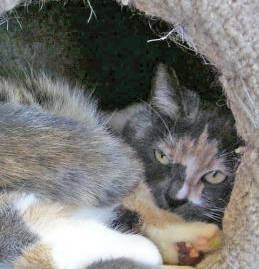

/content/drive/MyDrive/test/cat.1003.jpg
0.0


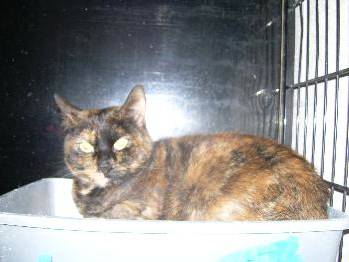

/content/drive/MyDrive/test/cat.1042.jpg
1.0


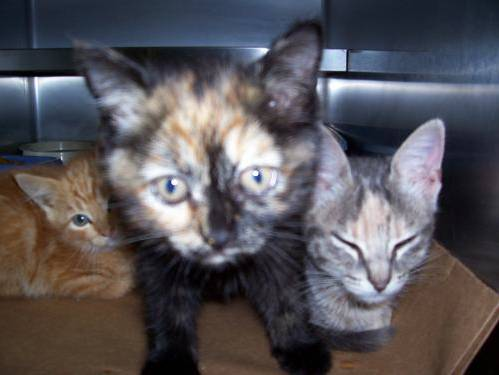

/content/drive/MyDrive/test/cat.1046.jpg
1.0


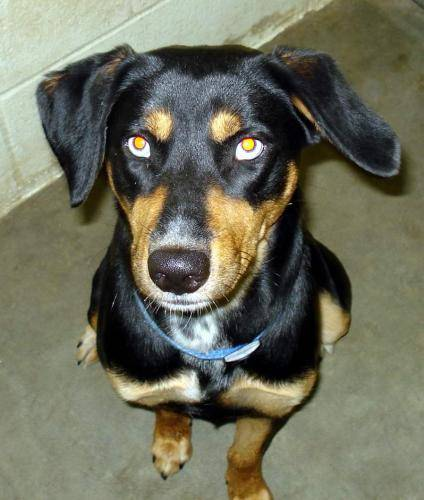

/content/drive/MyDrive/test/dog.1025.jpg
0.0


In [ ]:
for i in range(len(imagePaths)):
  name = imagePaths[i]
  if 'cat.1046' in name.lower():
    cv2_imshow(X_test[i])
    print(imagePaths[i])
    print(y_pred[i])
  if 'dog.1025' in name.lower():
    cv2_imshow(X_test[i])
    print(imagePaths[i])
    print(y_pred[i])
  if 'cat.1042' in name.lower():
    cv2_imshow(X_test[i])
    print(imagePaths[i])
    print(y_pred[i])
  if 'cat.1003' in name.lower():
    cv2_imshow(X_test[i])
    print(imagePaths[i])
    print(y_pred[i])


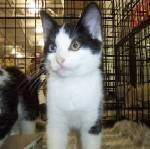

/content/drive/MyDrive/test/cat.1000.jpg


In [ ]:
cv2_imshow(X_test[0])
print(imagePaths[0])

In [ ]:
len(y_pred)

100